#**Daibetes Prediction**

###**About Data**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes

##**Content**
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1)

*Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")*

#**Importing DataSet and Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/diabetes (1).csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#**Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#stastical properties of dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




*   No missing values in data
*   lot's of Noise in `Pregnancies`, `Glucose`, `BloodPressure`,`SkinThickness`, `Insulin`, `BMI`.




In [26]:
#unique values in Pregnancies

df.Pregnancies.nunique()

17

In [17]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [27]:
#frequency of distribution of outcome

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

*  Unbalanced dataset, we need to balance it.
*  `Glucose`, `BloodPressure`,`SkinThickness`, `Insulin`, `BMI` is having 0 values which is not possible, will replace it with nan values

In [28]:
df[['BloodPressure','Glucose','SkinThickness','Insulin','BMI']] = df[['BloodPressure','Glucose','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [29]:
#checking null values

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#**Data Visualisation**

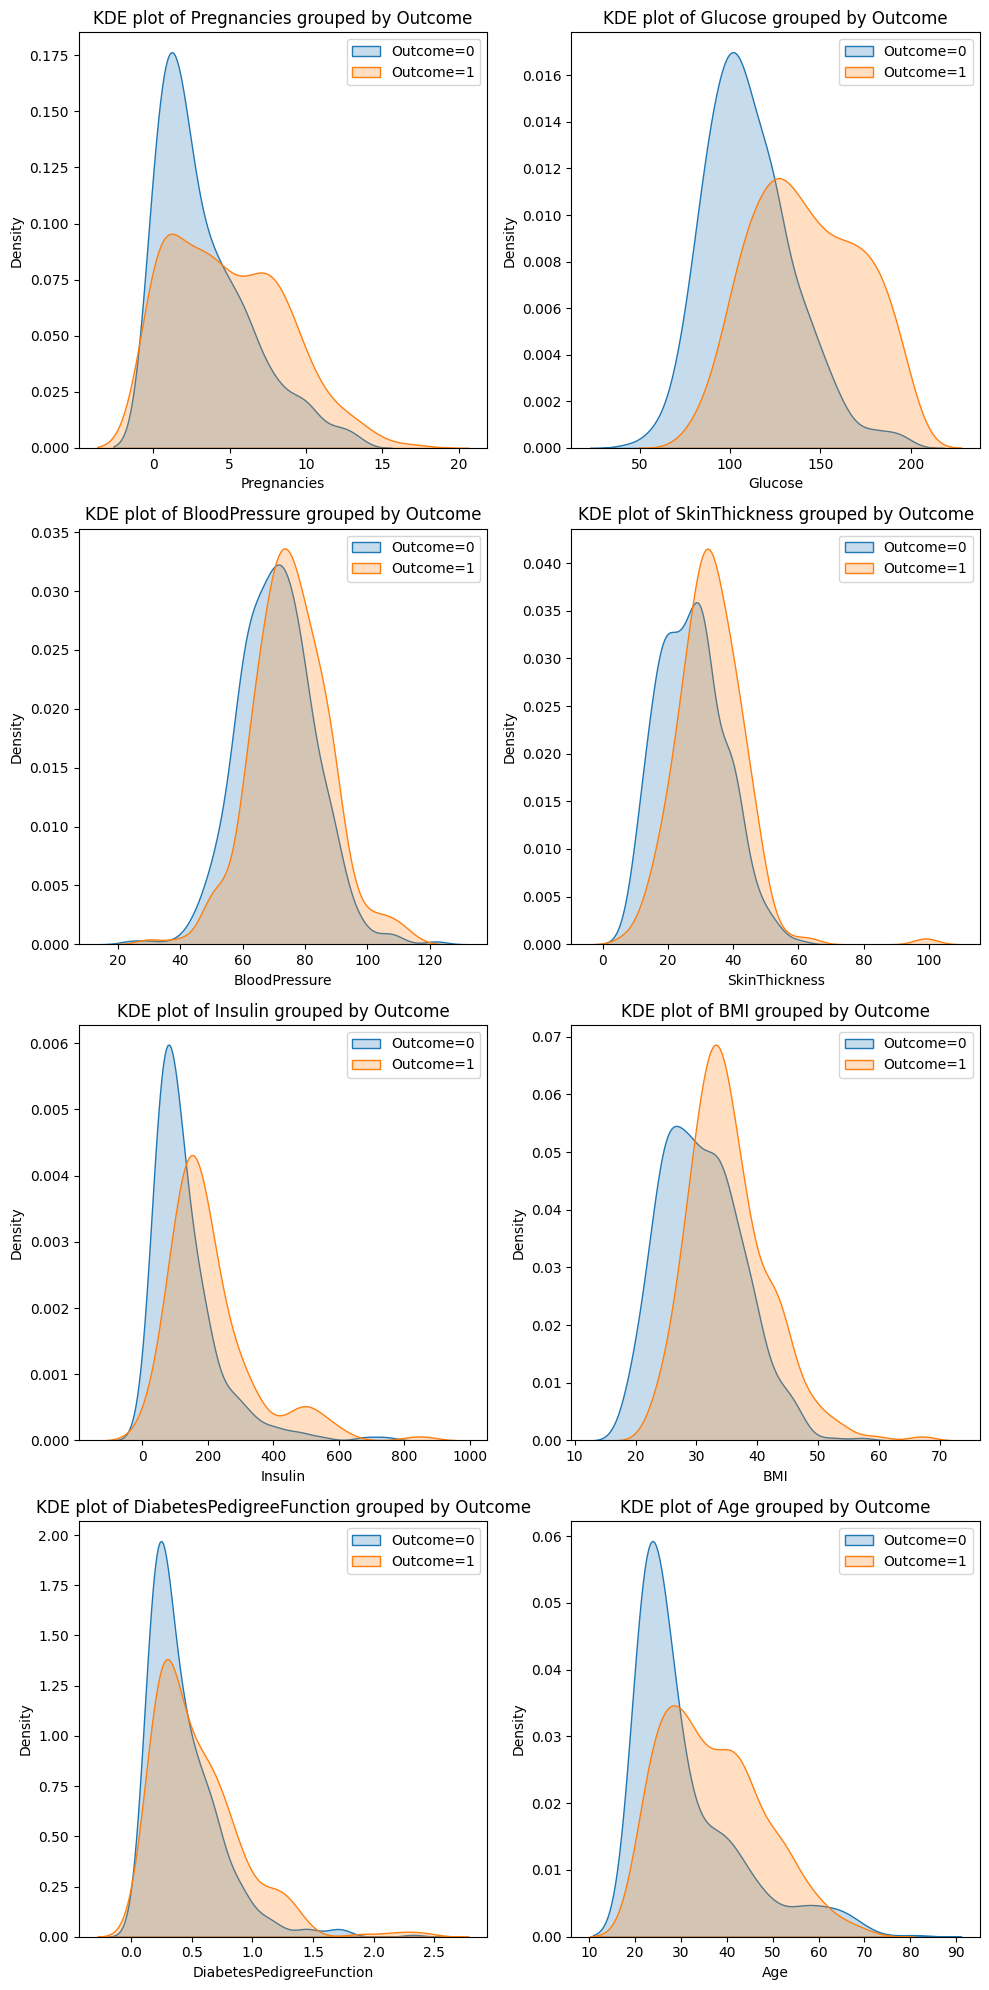

In [30]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=df[df['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

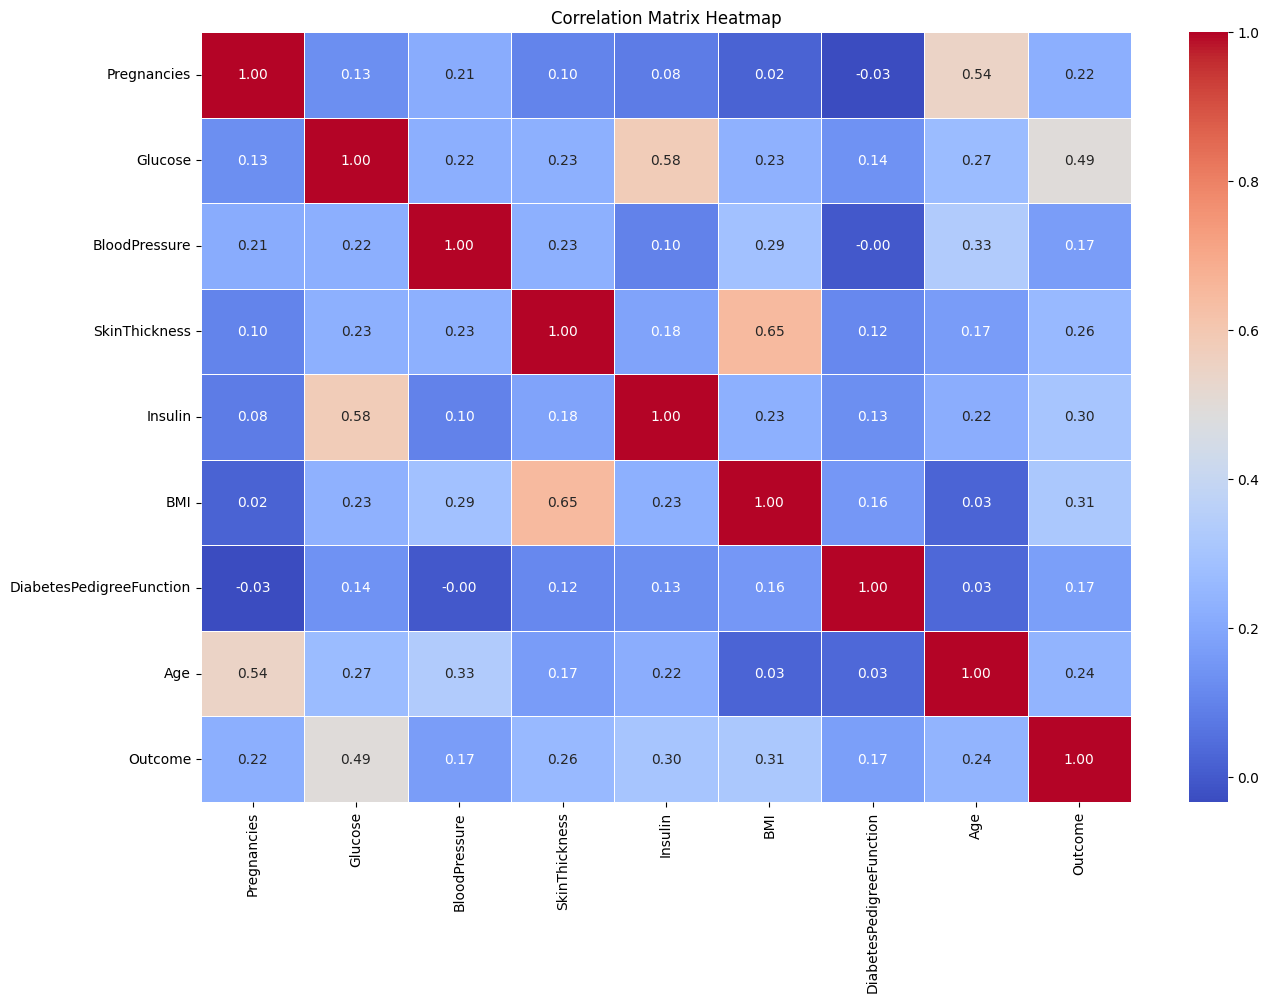

In [31]:
#correlation Metrics

#Graph I.
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

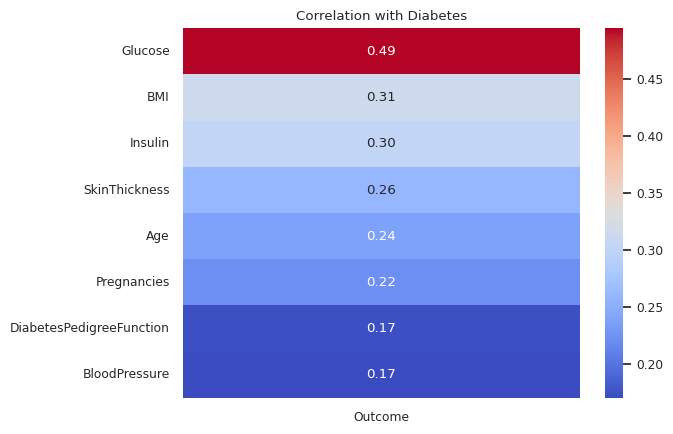

In [32]:
#Graph II
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [34]:
#spliting the data for experiments

X = df.drop('Outcome', axis=1)
y = df['Outcome']

#**Model Training**

##**Experiment 1: KNN imputers for missing values**

In [37]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [39]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer




In [36]:
#fit with robust scaler for knn best K-selection experiment
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [42]:

#Finding the optimal n_neighbour value for KNN imputer

results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , np.mean(scores)))

n_neighbors= 1 || accuracy (0.7721)
n_neighbors= 3 || accuracy (0.7656)
n_neighbors= 5 || accuracy (0.7682)
n_neighbors= 7 || accuracy (0.7695)
n_neighbors= 9 || accuracy (0.7721)


*  for n=1 accuracy is maximun

In [43]:
#Fit the KNN imputer with selected value

knn_pipeline = Pipeline(
    steps =[
        ('imputer', KNNImputer(n_neighbors=1)),
        ('RobustScaler', RobustScaler())
    ]
)


In [45]:
X_knn = knn_pipeline.fit_transform(X)

##**Balancing data**

In [46]:

from imblearn.combine import SMOTETomek

#Resampling the minority class
smt = SMOTETomek(random_state=42, sampling_strategy='minority',n_jobs=-1)
#fit the model to generate the data
X_res, y_res = smt.fit_resample(X_knn,y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


##**Function For model Training and Evaluation**

In [47]:

def evaluate_clf(true,predicted):
  """
  This function will take true and predicted values
  Return: Accuracy, F1_score, Precision, Recall, Roc-Auc curve
  """
  #Accuracy
  acc = accuracy_score(true,predicted)
  #F1_score
  f1 = f1_score(true, predicted)
  #Precision
  precision = precision_score(true, predicted)
  #Recall
  recall = recall_score(true, predicted)
  #ROC-AUC Score
  roc_auc = roc_auc_score(true, predicted)

  return acc,f1,precision,recall,roc_auc

In [74]:
#Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


    models_list = []
    train_accuracy_list = []
    test_accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)



        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)





        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        train_accuracy_list.append(model_train_accuracy)


        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        test_accuracy_list.append(model_test_accuracy)


        print('='*35)
        print('\n')

         #confusion metrics
        cm = confusion_matrix(y_test, y_test_pred)
        #Plot the confusion matrix.
        sns.heatmap(cm,
                    annot=True,
                    fmt='g',
                    xticklabels=['1', '0'],
                    yticklabels=['1', '0'])
        plt.ylabel('Prediction',fontsize=13)
        plt.xlabel('Actual',fontsize=13)
        plt.title('Confusion Matrix',fontsize=17)
        plt.show()
        print('*'*35)
        print('\n')


    report=pd.DataFrame(list(zip(models_list,train_accuracy_list, test_accuracy_list)), columns=['Model Name','Train Accuracy','Test Accuracy']).sort_values(by=['Test Accuracy'])

    return report

**Default Models**

In [49]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8229
- F1 score: 0.8172
- Precision: 0.7835
- Recall: 0.8539
- Roc Auc Score: 0.8250




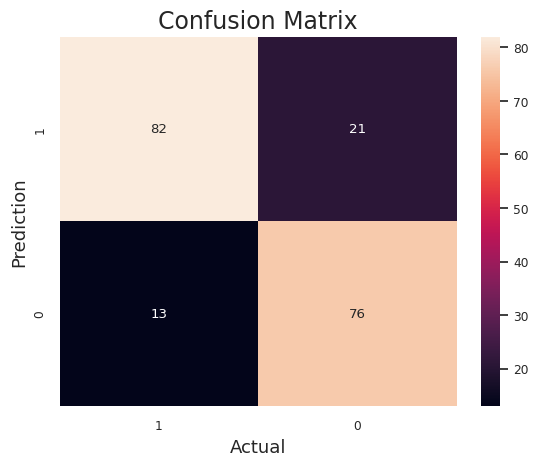

***********************************


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.7910
- Precision: 0.7955
- Recall: 0.7865
- Roc Auc Score: 0.8059




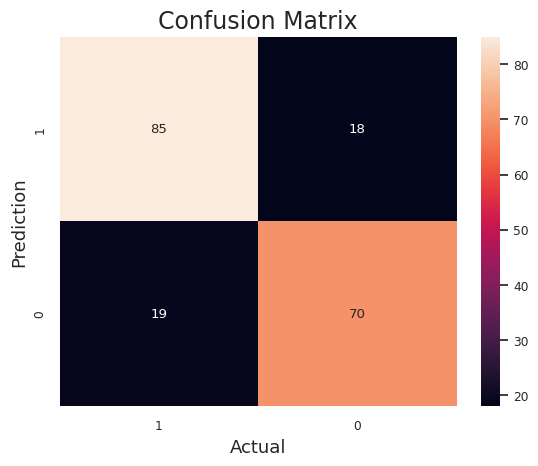

***********************************


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9388
- F1 score: 0.9406
- Precision: 0.9300
- Recall: 0.9514
- Roc Auc Score: 0.9386
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.8021
- Precision: 0.7653
- Recall: 0.8427
- Roc Auc Score: 0.8097




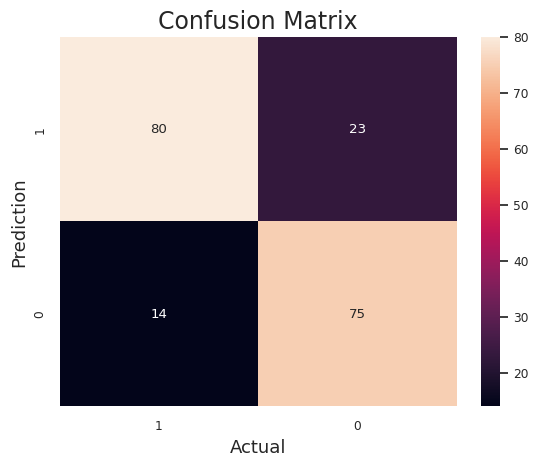

***********************************


Logistic Regression
Model performance for Training set
- Accuracy: 0.7682
- F1 score: 0.7694
- Precision: 0.7795
- Recall: 0.7596
- Roc Auc Score: 0.7684
----------------------------------
Model performance for Test set
- Accuracy: 0.7812
- F1 score: 0.7742
- Precision: 0.7423
- Recall: 0.8090
- Roc Auc Score: 0.7831




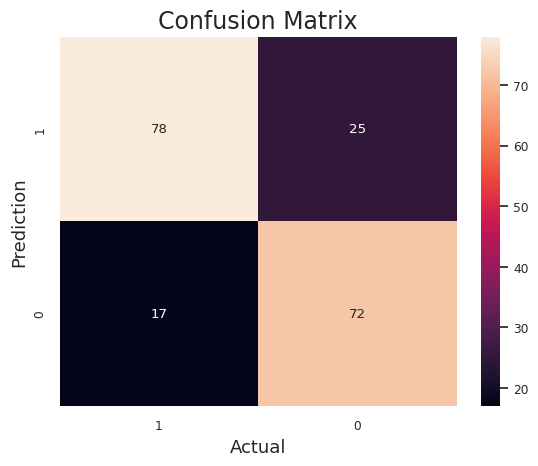

***********************************


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8516
- F1 score: 0.8633
- Precision: 0.8126
- Recall: 0.9207
- Roc Auc Score: 0.8503
----------------------------------
Model performance for Test set
- Accuracy: 0.7812
- F1 score: 0.7981
- Precision: 0.6975
- Recall: 0.9326
- Roc Auc Score: 0.7915




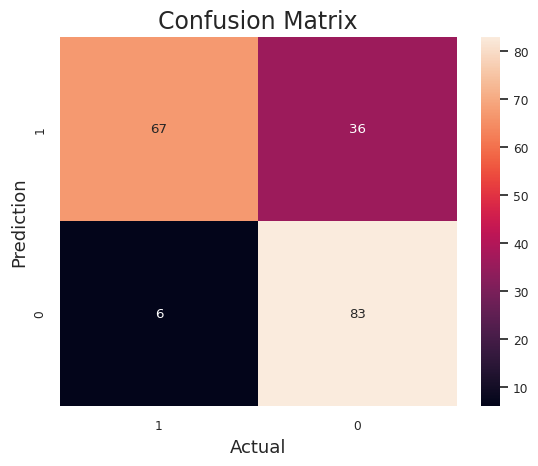

***********************************


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8385
- F1 score: 0.8360
- Precision: 0.7900
- Recall: 0.8876
- Roc Auc Score: 0.8419




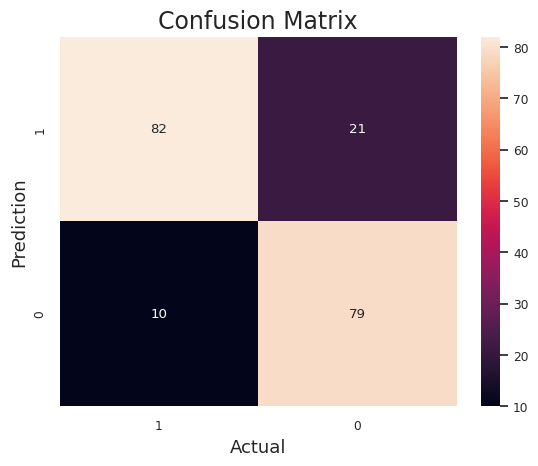

***********************************


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9779
- F1 score: 0.9784
- Precision: 0.9722
- Recall: 0.9847
- Roc Auc Score: 0.9777
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.8105
- Precision: 0.7624
- Recall: 0.8652
- Roc Auc Score: 0.8161




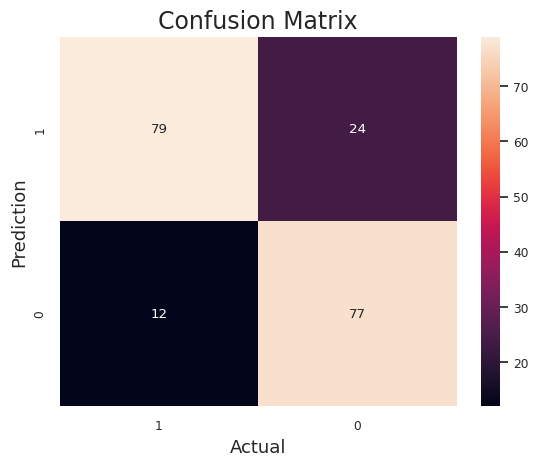

***********************************


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8620
- F1 score: 0.8685
- Precision: 0.8434
- Recall: 0.8951
- Roc Auc Score: 0.8614
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.8042
- Precision: 0.7600
- Recall: 0.8539
- Roc Auc Score: 0.8105




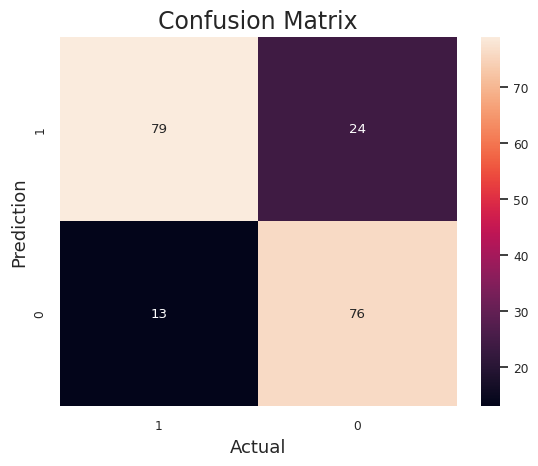

***********************************




In [75]:

#Fit KNN imputed data for models in dictionary

report_knn = evaluate_models(X_res, y_res, models)

**Report**

In [57]:
report_knn

,Model Name,Train Accuracy,Test Accuracy
1,Decision Tree,1.000000,0.746114
3,Logistic Regression,0.762646,0.751295
5,XGBClassifier,1.000000,0.777202
2,Gradient Boosting,0.946822,0.782383
7,AdaBoost Classifier,0.865110,0.782383
0,Random Forest,1.000000,0.787565
6,CatBoosting Classifier,0.977951,0.803109
4,K-Neighbors Classifier,0.854734,0.808290


*  **Logistic Regression doing best in This Experiment**

##**Experiment: 2 = Simple Imputer with Strategy Median**

In [76]:
#Fit the KNN imputer with median strategy

median_pipeline = Pipeline(
    steps =[
        ('imputer', SimpleImputer(strategy='median')),
        ('RobustScaler', RobustScaler())
    ]
)


In [77]:
X_median = median_pipeline.fit_transform(X)

In [78]:

#Resampling the minority class
smt = SMOTETomek(random_state=42, sampling_strategy='minority',n_jobs=-1)
#fit the model to generate the data
X_res, y_res = smt.fit_resample(X_median,y)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8333
- F1 score: 0.8367
- Precision: 0.8367
- Recall: 0.8367
- Roc Auc Score: 0.8333




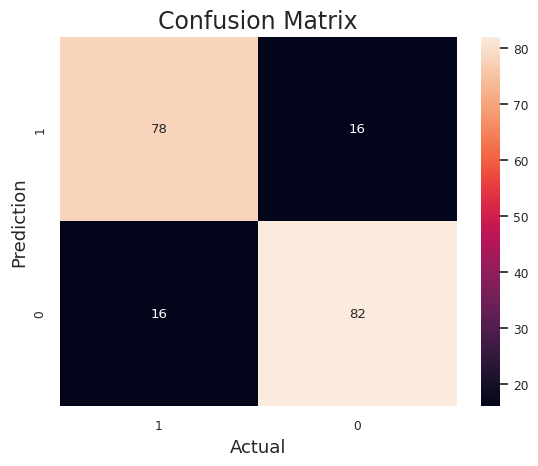

***********************************


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7396
- F1 score: 0.7500
- Precision: 0.7353
- Recall: 0.7653
- Roc Auc Score: 0.7390




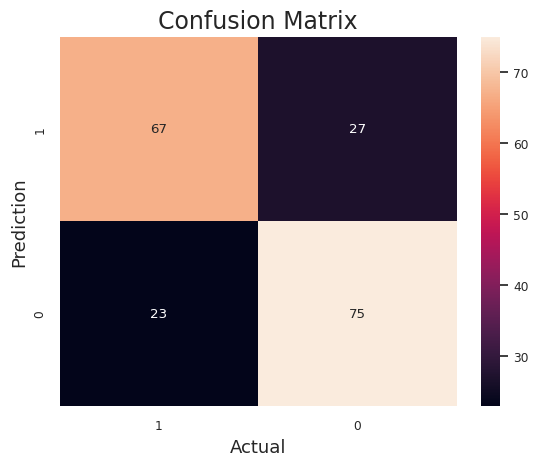

***********************************


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9450
- F1 score: 0.9456
- Precision: 0.9311
- Recall: 0.9605
- Roc Auc Score: 0.9451
----------------------------------
Model performance for Test set
- Accuracy: 0.7969
- F1 score: 0.8020
- Precision: 0.7980
- Recall: 0.8061
- Roc Auc Score: 0.7967




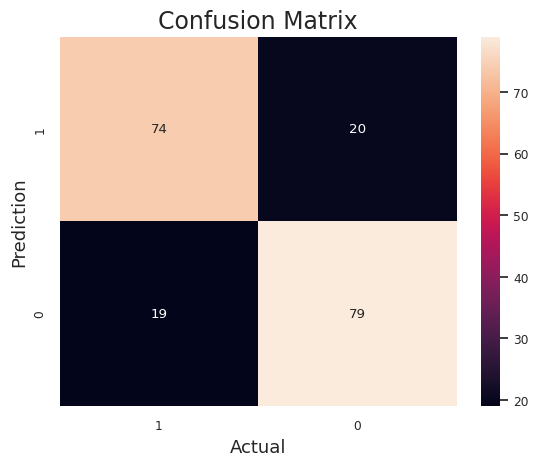

***********************************


Logistic Regression
Model performance for Training set
- Accuracy: 0.7683
- F1 score: 0.7624
- Precision: 0.7781
- Recall: 0.7474
- Roc Auc Score: 0.7682
----------------------------------
Model performance for Test set
- Accuracy: 0.7448
- F1 score: 0.7487
- Precision: 0.7526
- Recall: 0.7449
- Roc Auc Score: 0.7448




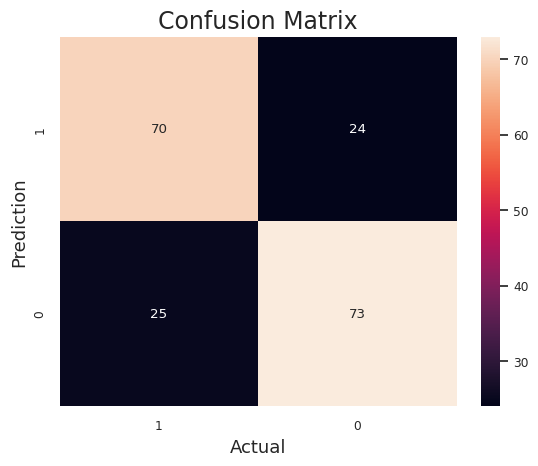

***********************************


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8665
- F1 score: 0.8738
- Precision: 0.8248
- Recall: 0.9289
- Roc Auc Score: 0.8668
----------------------------------
Model performance for Test set
- Accuracy: 0.7500
- F1 score: 0.7670
- Precision: 0.7315
- Recall: 0.8061
- Roc Auc Score: 0.7488




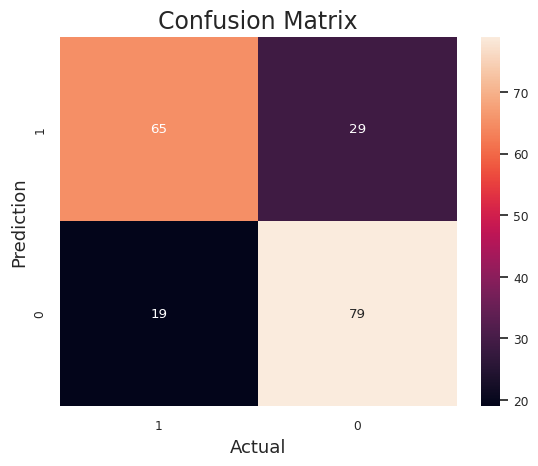

***********************************


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8385
- F1 score: 0.8473
- Precision: 0.8190
- Recall: 0.8776
- Roc Auc Score: 0.8377




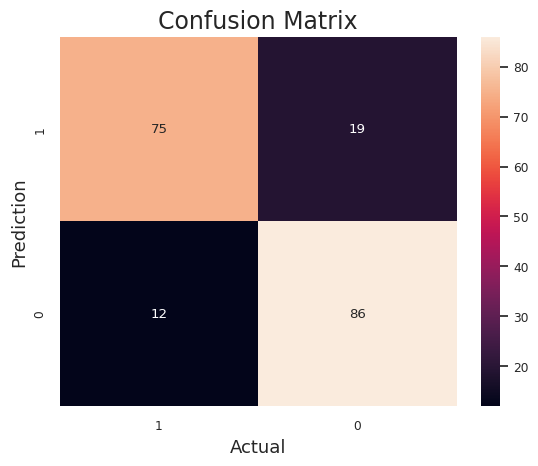

***********************************


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9777
- F1 score: 0.9777
- Precision: 0.9739
- Recall: 0.9816
- Roc Auc Score: 0.9778
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.8182
- Precision: 0.8100
- Recall: 0.8265
- Roc Auc Score: 0.8122




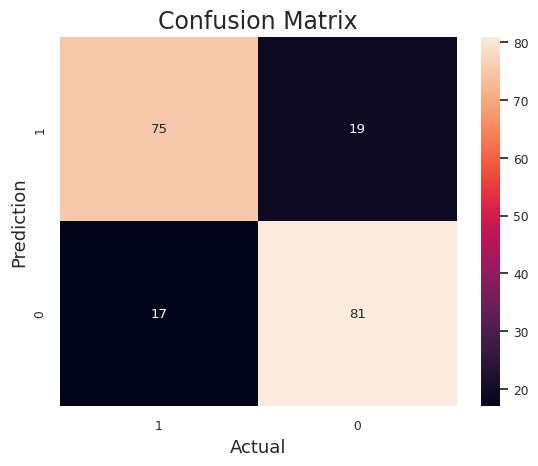

***********************************


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8586
- F1 score: 0.8597
- Precision: 0.8487
- Recall: 0.8711
- Roc Auc Score: 0.8587
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.8125
- Precision: 0.8298
- Recall: 0.7959
- Roc Auc Score: 0.8129




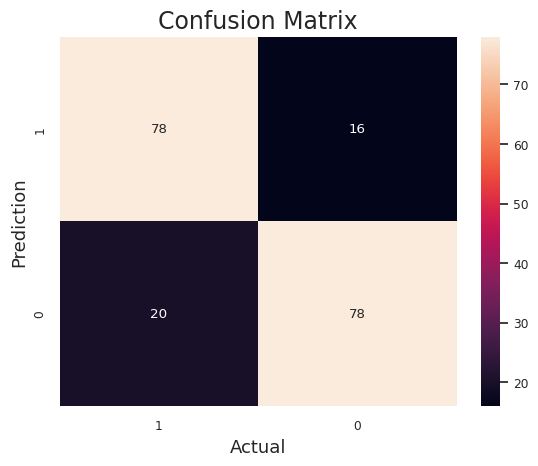

***********************************




In [79]:
report_median = evaluate_models(X_res, y_res, models)

In [80]:
#report median

report_median

,Model Name,Train Accuracy,Test Accuracy
1,Decision Tree,1.000000,0.739583
3,Logistic Regression,0.768325,0.744792
4,K-Neighbors Classifier,0.866492,0.750000
2,Gradient Boosting,0.945026,0.796875
6,CatBoosting Classifier,0.977749,0.812500
7,AdaBoost Classifier,0.858639,0.812500
0,Random Forest,1.000000,0.833333
5,XGBClassifier,1.000000,0.838542


##**Experiment: 3 = Simple Imputer with Strategy Constant**

In [81]:
#Fit the KNN imputer with constant strategy

median_pipeline = Pipeline(
    steps =[
        ('imputer', SimpleImputer(strategy='constant', fill_value = 0)),
        ('RobustScaler', RobustScaler())
    ]
)


In [82]:
X_constant = median_pipeline.fit_transform(X)

In [83]:
#Resampling the minority class
smt = SMOTETomek(random_state=42, sampling_strategy='minority',n_jobs=-1)
#fit the model to generate the data
X_res, y_res = smt.fit_resample(X_constant,y)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8342
- F1 score: 0.8280
- Precision: 0.7549
- Recall: 0.9167
- Roc Auc Score: 0.8437




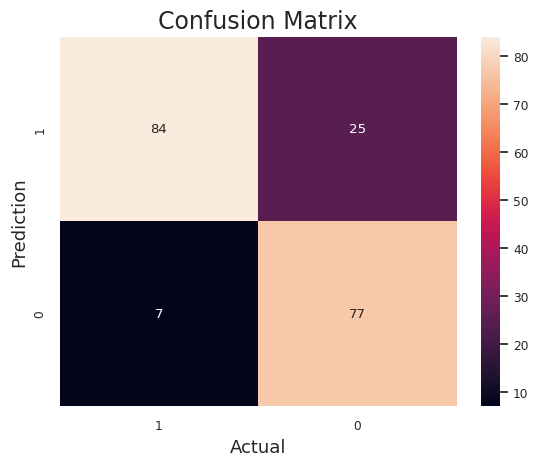

***********************************


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7409
- F1 score: 0.7340
- Precision: 0.6635
- Recall: 0.8214
- Roc Auc Score: 0.7502




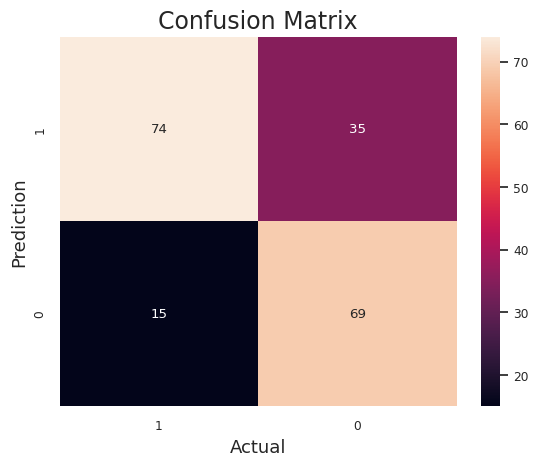

***********************************


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9415
- F1 score: 0.9448
- Precision: 0.9211
- Recall: 0.9698
- Roc Auc Score: 0.9405
----------------------------------
Model performance for Test set
- Accuracy: 0.8031
- F1 score: 0.7957
- Precision: 0.7255
- Recall: 0.8810
- Roc Auc Score: 0.8120




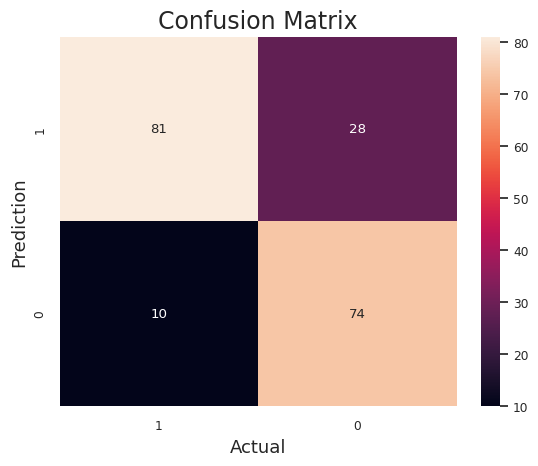

***********************************


Logistic Regression
Model performance for Training set
- Accuracy: 0.7594
- F1 score: 0.7643
- Precision: 0.7732
- Recall: 0.7557
- Roc Auc Score: 0.7596
----------------------------------
Model performance for Test set
- Accuracy: 0.7927
- F1 score: 0.7778
- Precision: 0.7292
- Recall: 0.8333
- Roc Auc Score: 0.7974




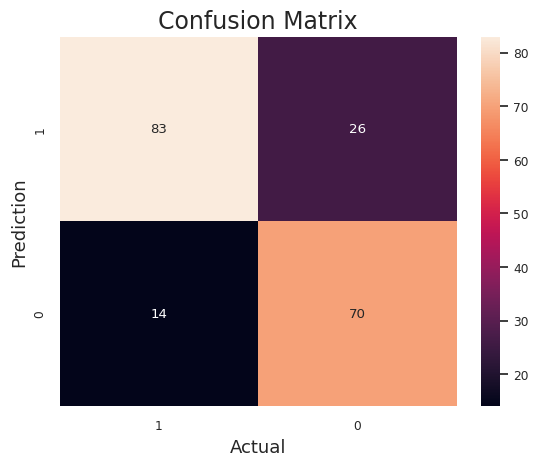

***********************************


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8492
- F1 score: 0.8612
- Precision: 0.8200
- Recall: 0.9068
- Roc Auc Score: 0.8472
----------------------------------
Model performance for Test set
- Accuracy: 0.8083
- F1 score: 0.8063
- Precision: 0.7196
- Recall: 0.9167
- Roc Auc Score: 0.8207




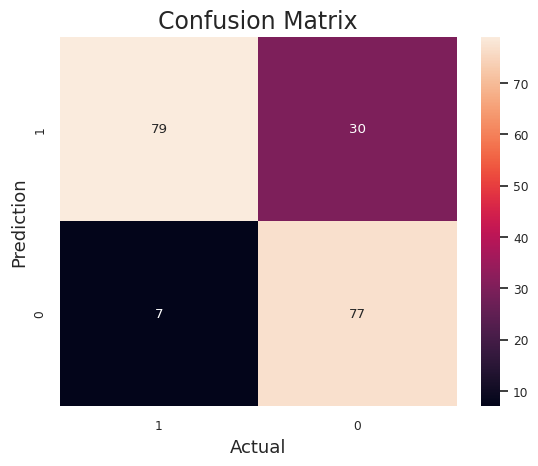

***********************************


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8031
- F1 score: 0.7912
- Precision: 0.7347
- Recall: 0.8571
- Roc Auc Score: 0.8093




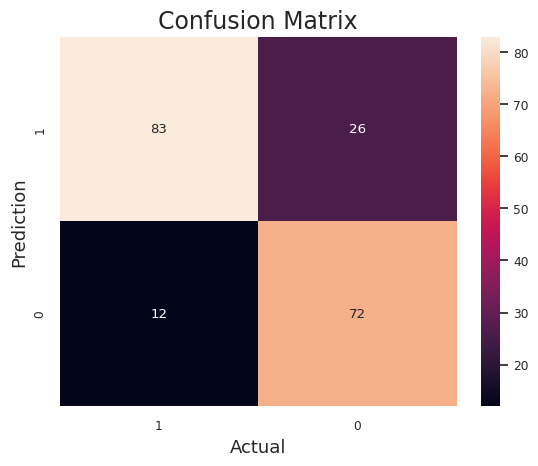

***********************************


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9766
- F1 score: 0.9774
- Precision: 0.9726
- Recall: 0.9824
- Roc Auc Score: 0.9764
----------------------------------
Model performance for Test set
- Accuracy: 0.8187
- F1 score: 0.8108
- Precision: 0.7426
- Recall: 0.8929
- Roc Auc Score: 0.8272




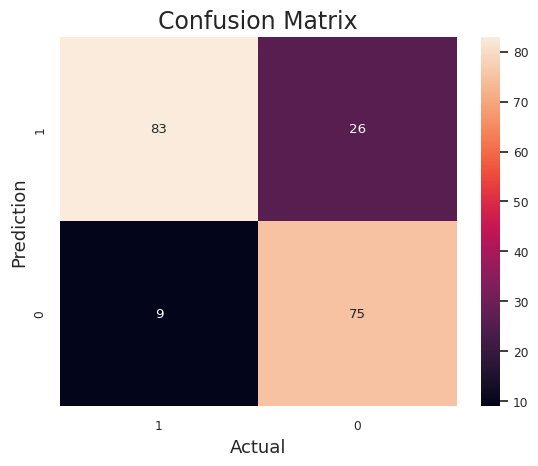

***********************************


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8544
- F1 score: 0.8614
- Precision: 0.8467
- Recall: 0.8766
- Roc Auc Score: 0.8536
----------------------------------
Model performance for Test set
- Accuracy: 0.7876
- F1 score: 0.7760
- Precision: 0.7172
- Recall: 0.8452
- Roc Auc Score: 0.7942




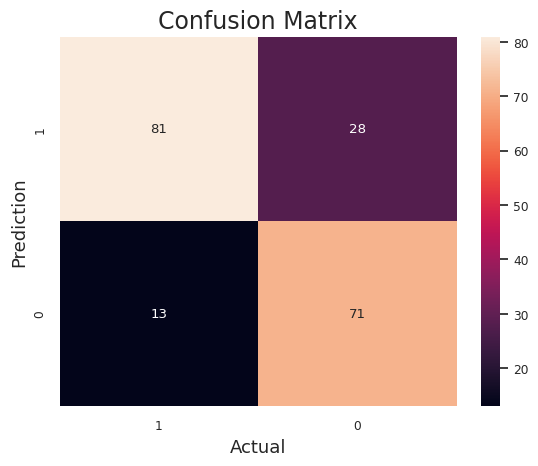

***********************************




In [84]:
report_constant = evaluate_models(X_res, y_res, models)

In [85]:
#Report
report_constant

,Model Name,Train Accuracy,Test Accuracy
1,Decision Tree,1.000000,0.740933
7,AdaBoost Classifier,0.854356,0.787565
3,Logistic Regression,0.759428,0.792746
2,Gradient Boosting,0.941482,0.803109
5,XGBClassifier,1.000000,0.803109
4,K-Neighbors Classifier,0.849155,0.808290
6,CatBoosting Classifier,0.976593,0.818653
0,Random Forest,1.000000,0.834197


##**Experiment: 4 = Simple Imputer with Strategy Mean**

In [86]:
#Fit the KNN imputer with mean strategy

mean_pipeline = Pipeline(
    steps =[
        ('imputer', SimpleImputer(strategy='mean')),
        ('RobustScaler', RobustScaler())
    ]
)


In [87]:
X_mean = mean_pipeline.fit_transform(X)

In [88]:
#Resampling the minority class
smt = SMOTETomek(random_state=42, sampling_strategy='minority',n_jobs=-1)
#fit the model to generate the data
X_res, y_res = smt.fit_resample(X_mean,y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8281
- F1 score: 0.8254
- Precision: 0.7800
- Recall: 0.8764
- Roc Auc Score: 0.8314




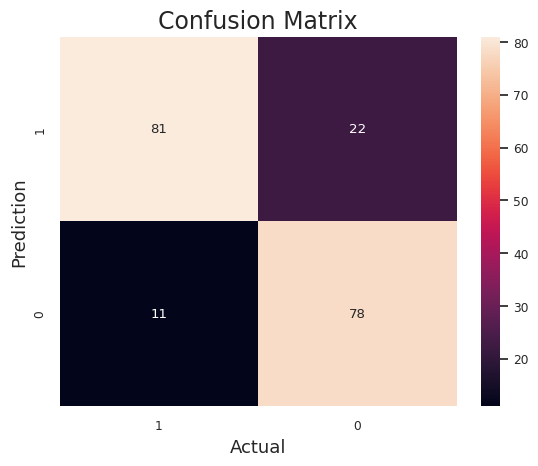

***********************************


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8177
- F1 score: 0.8023
- Precision: 0.8068
- Recall: 0.7978
- Roc Auc Score: 0.8164




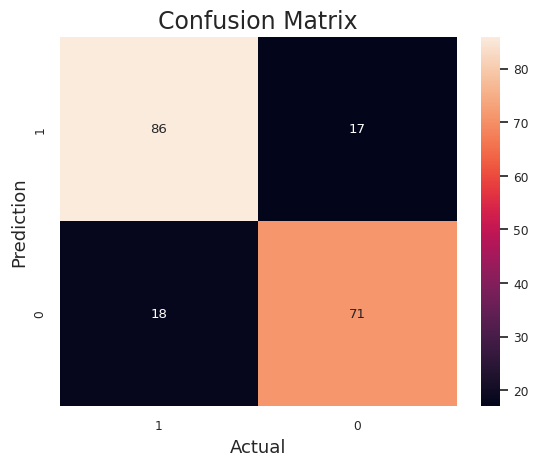

***********************************


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9388
- F1 score: 0.9406
- Precision: 0.9300
- Recall: 0.9514
- Roc Auc Score: 0.9386
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.8021
- Precision: 0.7653
- Recall: 0.8427
- Roc Auc Score: 0.8097




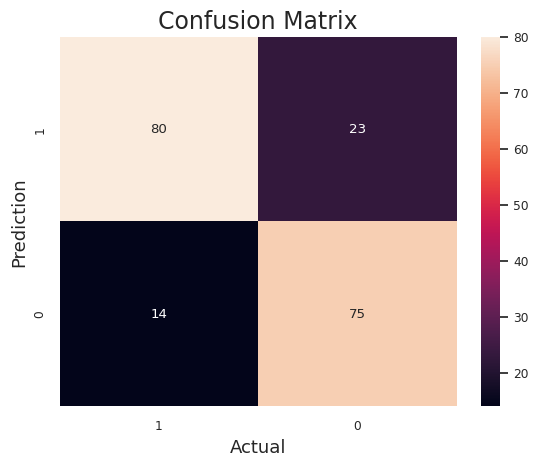

***********************************


Logistic Regression
Model performance for Training set
- Accuracy: 0.7682
- F1 score: 0.7694
- Precision: 0.7795
- Recall: 0.7596
- Roc Auc Score: 0.7684
----------------------------------
Model performance for Test set
- Accuracy: 0.7812
- F1 score: 0.7742
- Precision: 0.7423
- Recall: 0.8090
- Roc Auc Score: 0.7831




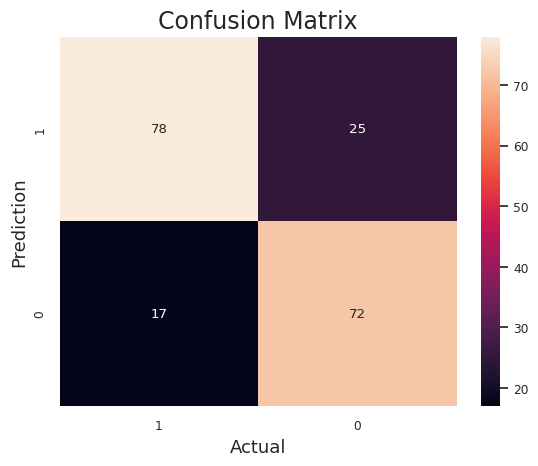

***********************************


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8516
- F1 score: 0.8633
- Precision: 0.8126
- Recall: 0.9207
- Roc Auc Score: 0.8503
----------------------------------
Model performance for Test set
- Accuracy: 0.7812
- F1 score: 0.7981
- Precision: 0.6975
- Recall: 0.9326
- Roc Auc Score: 0.7915




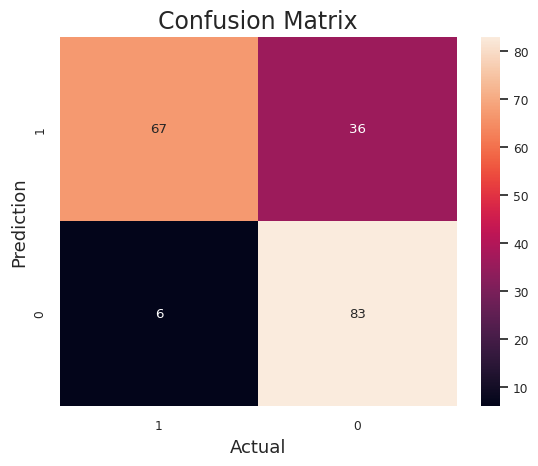

***********************************


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8385
- F1 score: 0.8360
- Precision: 0.7900
- Recall: 0.8876
- Roc Auc Score: 0.8419




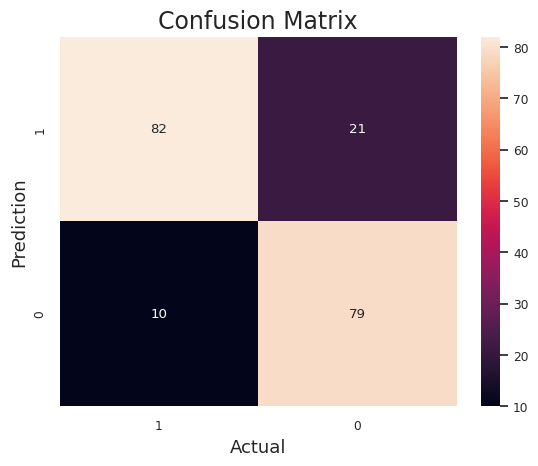

***********************************


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9779
- F1 score: 0.9784
- Precision: 0.9722
- Recall: 0.9847
- Roc Auc Score: 0.9777
----------------------------------
Model performance for Test set
- Accuracy: 0.8125
- F1 score: 0.8105
- Precision: 0.7624
- Recall: 0.8652
- Roc Auc Score: 0.8161




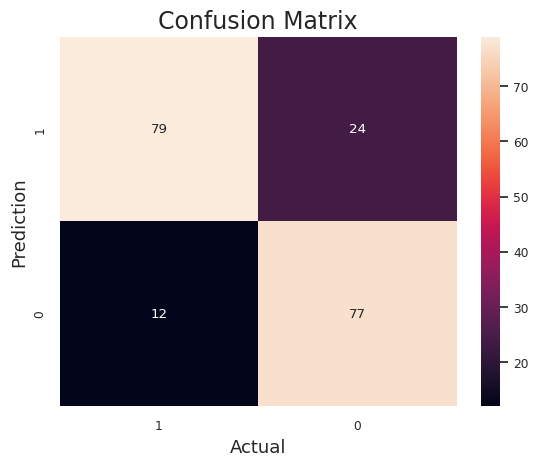

***********************************


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8620
- F1 score: 0.8685
- Precision: 0.8434
- Recall: 0.8951
- Roc Auc Score: 0.8614
----------------------------------
Model performance for Test set
- Accuracy: 0.8073
- F1 score: 0.8042
- Precision: 0.7600
- Recall: 0.8539
- Roc Auc Score: 0.8105




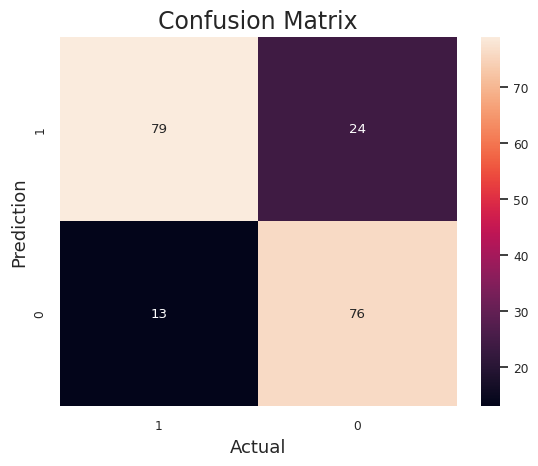

***********************************




In [89]:
#training model
report_mean = evaluate_models(X_res, y_res, models)

In [90]:
#report
report_mean

,Model Name,Train Accuracy,Test Accuracy
3,Logistic Regression,0.768229,0.781250
4,K-Neighbors Classifier,0.851562,0.781250
2,Gradient Boosting,0.938802,0.807292
7,AdaBoost Classifier,0.861979,0.807292
6,CatBoosting Classifier,0.977865,0.812500
1,Decision Tree,1.000000,0.817708
0,Random Forest,1.000000,0.828125
5,XGBClassifier,1.000000,0.838542


#**Final Model: XCBoostClassifier with Mean impute Str**

In [91]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


In [93]:

print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))


Final XGBoost Classifier Accuracy Score (Train) : 1.0
Final XGBoost Classifier Accuracy Score (Test) : 0.8385416666666666


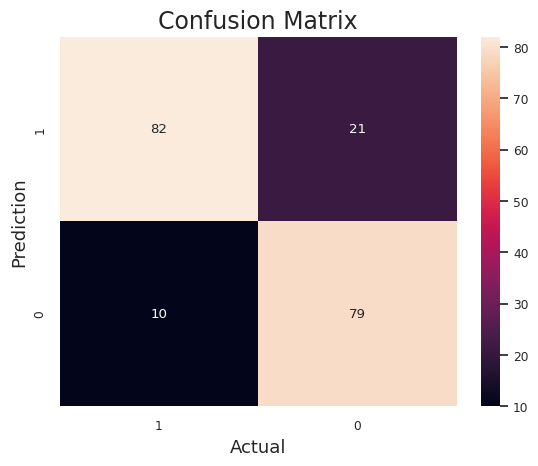

In [94]:
cm = confusion_matrix(y_test, y_pred)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


**Creating a pickle file**

In [95]:
import pickle

pickle.dump(final_model, open('XGBclfmodel.pkl', 'wb'))